In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import pandas as pd

In [ ]:
root_output_dir = os.environ.get("DART_WORK_DIR", "")

In [89]:
aggregated_table = os.path.join(
    root_output_dir,
    "task_2_footprinting/outputs/evals/embeddings/nucleotide-transformer-v2-500m-multi-species.tsv",
)
agg_data = pd.read_csv(aggregated_table, sep="\t", index_col=0)

In [90]:
motif_family_file = os.path.join(
    root_output_dir, "task_2_footprinting/input_data/H12CORE_motifs.tsv"
)
motif_family_data = pd.read_csv(motif_family_file, sep="\t", index_col=0)
agg_data["Family"] = motif_family_data["TF family"]

Text(0, 0.5, 'Motif Count')

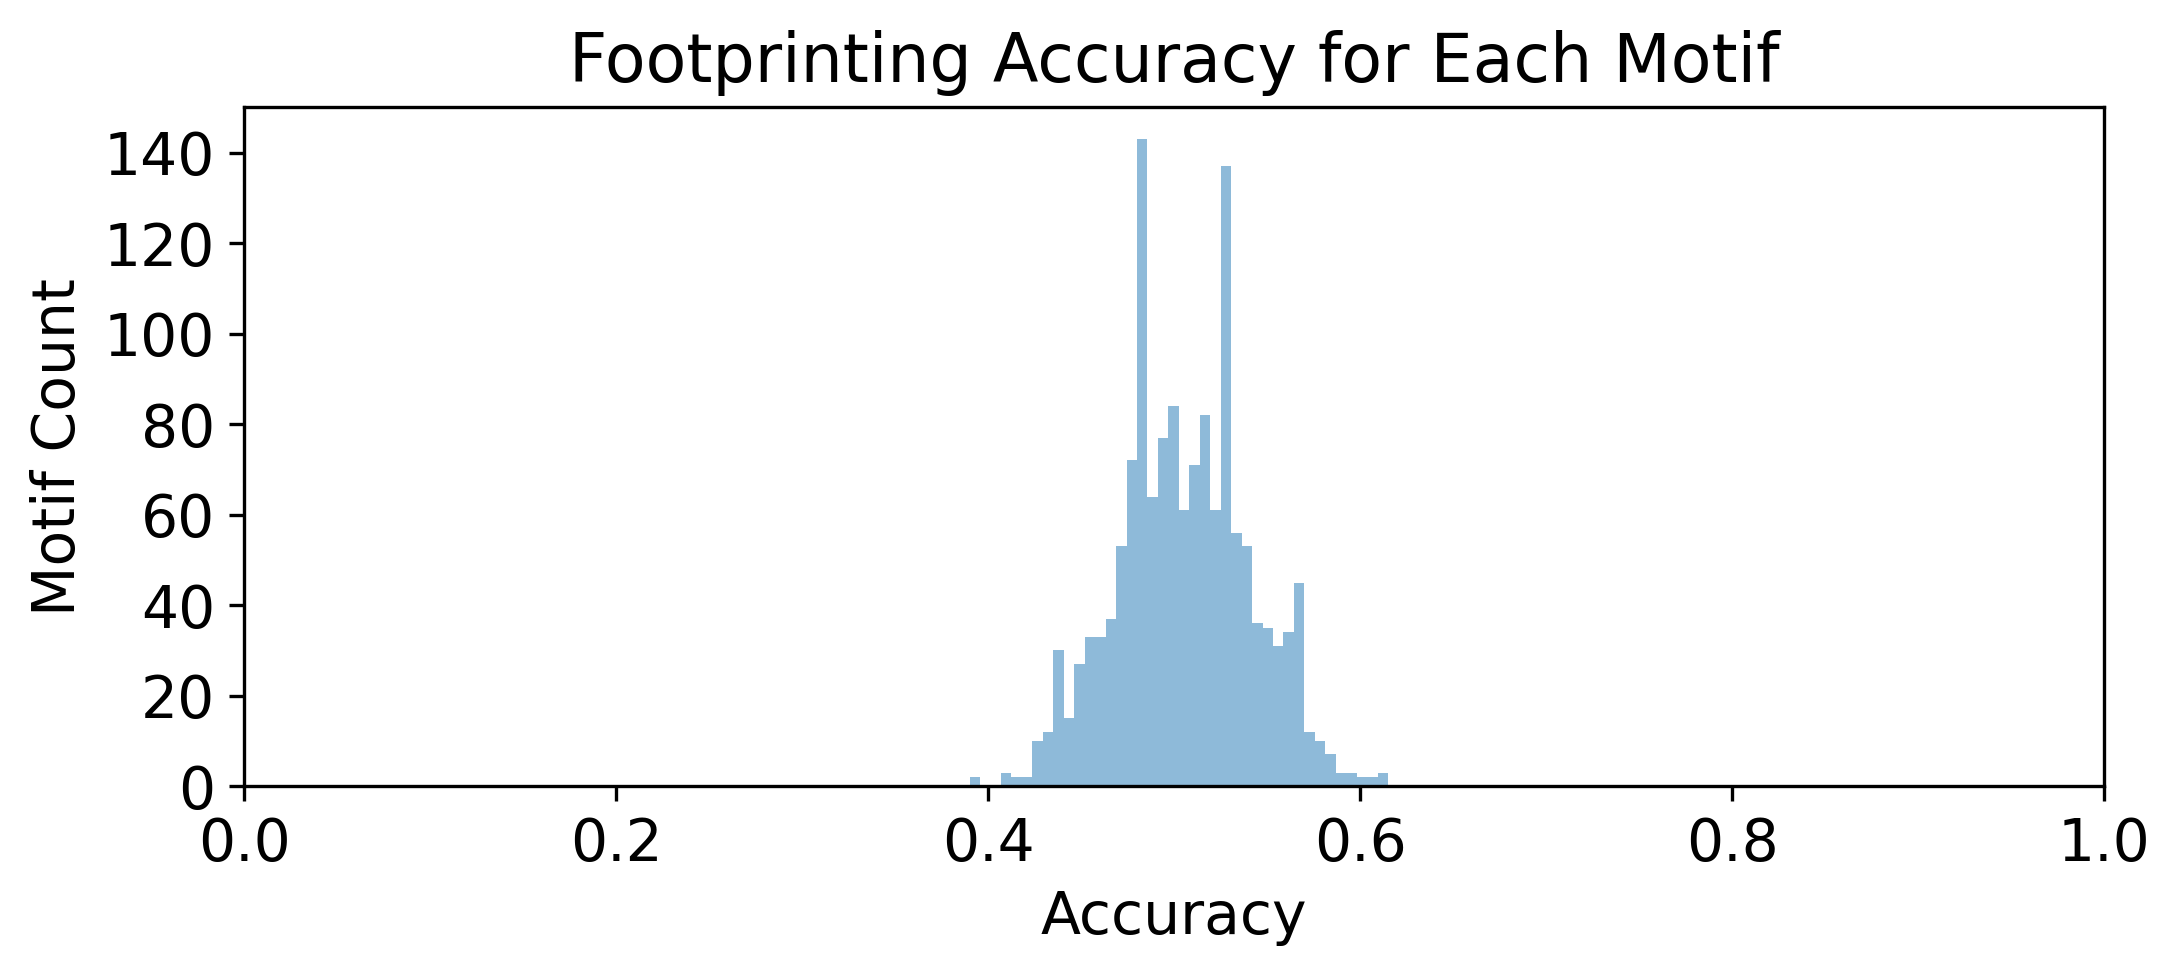

In [92]:
plt.figure(dpi=300, figsize=[8, 3])
plt.hist(agg_data["Accuracy"], bins=40, alpha=0.5)
plt.title("Footprinting Accuracy for Each Motif", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Motif Count", fontsize=14)

In [71]:
family_acc_means = agg_data.groupby("Family")["Accuracy"].mean()
family_acc_vars = agg_data.groupby("Family")["Accuracy"].apply(lambda x: np.var(x))

In [72]:
mean_order = family_acc_means.sort_values().index.values

In [73]:
acc_vals, acc_labels, lengths = [], [], []
for family in mean_order:
    cur_accs = agg_data.loc[agg_data["Family"] == family]["Accuracy"].values
    if len(cur_accs) < 10:
        continue
    acc_vals.append(cur_accs)
    lengths.append(len(cur_accs))
    acc_labels.append(family.split(" {")[0] + f" ({len(cur_accs)})")

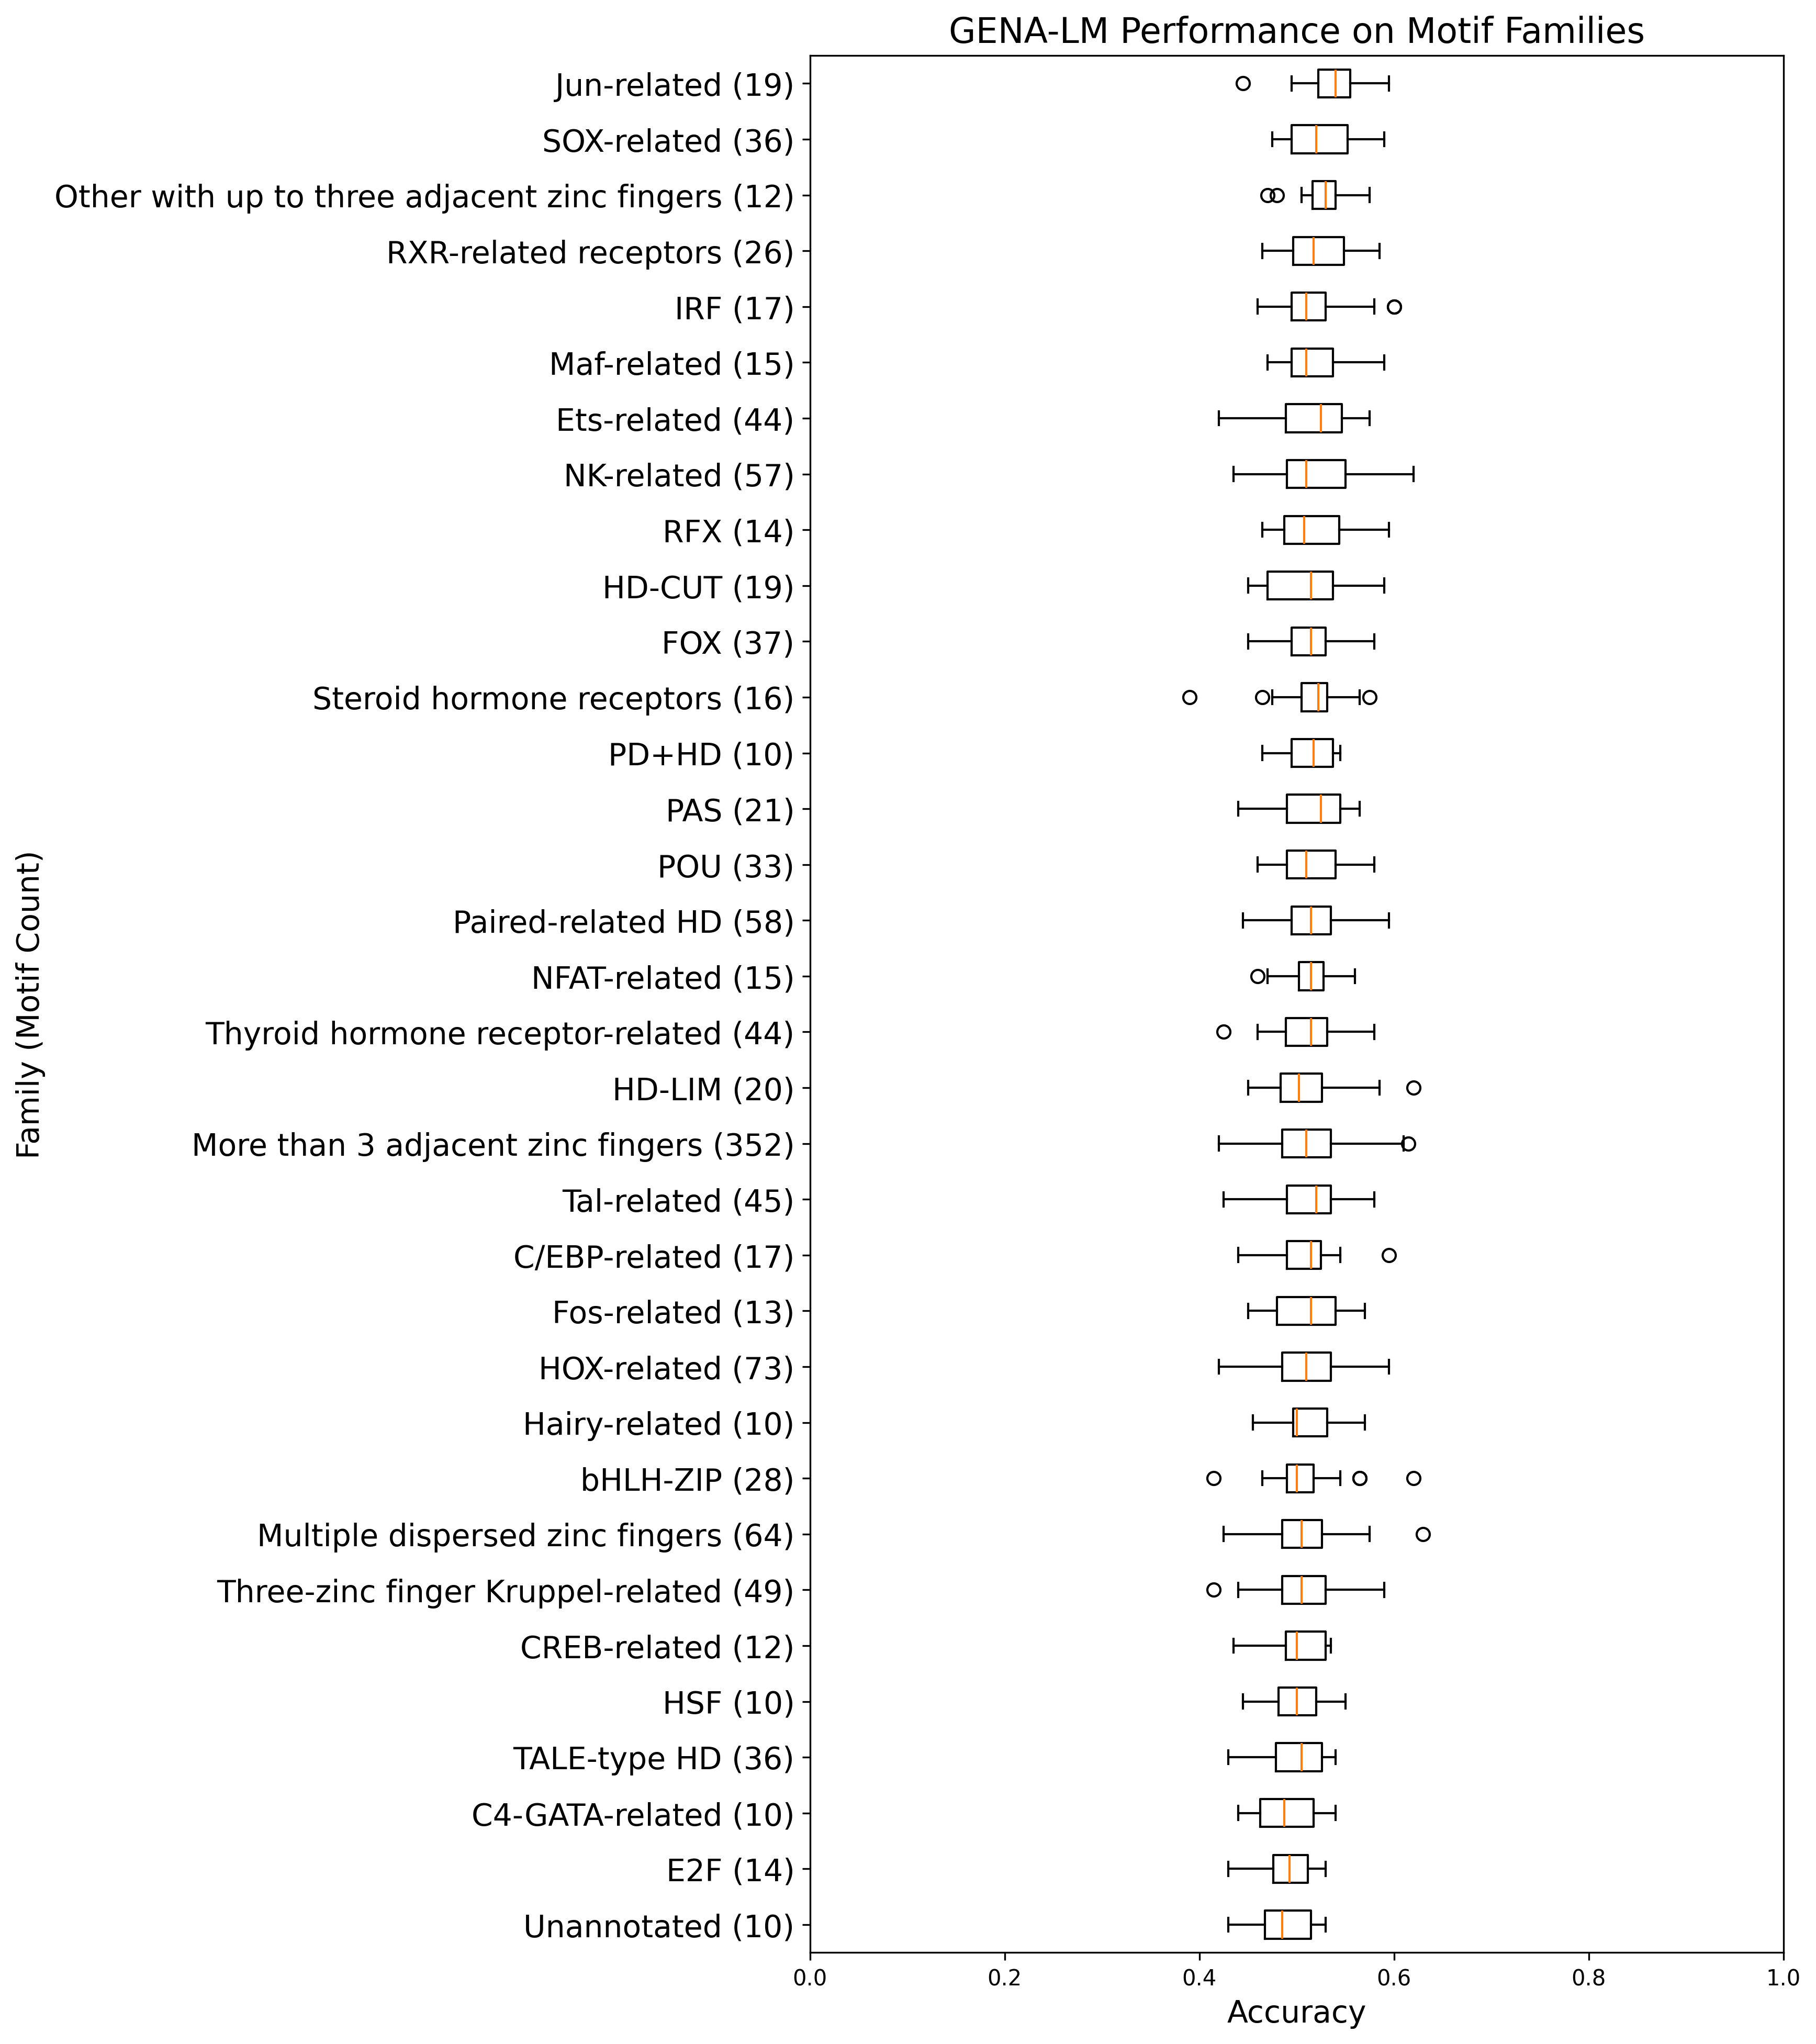

In [75]:
plt.figure(dpi=300, figsize=[8, 16])
plt.boxplot(acc_vals, vert=False, labels=acc_labels)
plt.title("GENA-LM Performance on Motif Families", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel("Family (Motif Count)", fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
np.quantile(agg_data["Accuracy"], 0), np.quantile(
    agg_data["Accuracy"], 0.25
), np.quantile(agg_data["Accuracy"], 0.5), np.quantile(
    agg_data["Accuracy"], 0.75
), np.quantile(
    agg_data["Accuracy"], 1
)

(0.39, 0.48, 0.505, 0.53, 0.615)